In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/Users/Apple/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [124]:
arr = [[1,2],[3,4]]

In [125]:
np.reshape(arr,(4,1))

array([[1],
       [2],
       [3],
       [4]])

In [145]:
feat = pd.read_csv('feature.csv',delim_whitespace=True, header = None)

In [146]:
stress = pd.read_csv('StressData_100_100.csv',delim_whitespace=True,header=None)

In [147]:
strain = pd.read_csv('StrainData.csv', delim_whitespace=True, header = None)

In [148]:
strain = pd.DataFrame(strain.values.reshape(100,1))

In [149]:
stress = pd.DataFrame(stress.values.reshape(10000,1))

In [150]:
feat[0] = feat.index

In [151]:
feat.columns = ['merge_on', 1, 2, 3, 4]

In [152]:
strain['merge_on'] = strain.index

In [153]:
stress['merge_on'] = stress.index

In [154]:
stress['merge_on'] = stress['merge_on']/100

In [155]:
stress['merge_on'] = stress['merge_on'].astype(int)

In [156]:
stress.columns = ['stress', u'merge_on']

In [157]:
strain.columns = ['strain', u'merge_on']

In [158]:
# stress

In [159]:
master = pd.merge(stress, feat, on = 'merge_on', how = 'left')

In [160]:
master['merge_on'] = stress.index%100

In [161]:
master = pd.merge(master, strain, on = 'merge_on', how = 'left')

In [162]:
master = master.drop('merge_on', axis = 1)

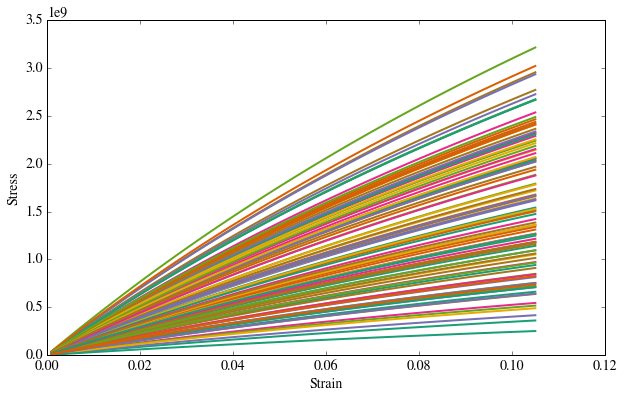

In [171]:
for i in range(100):
    plt.plot(master.iloc[i*100:i*100+100]['strain'],master.iloc[i*100:i*100+100]['stress'])
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.show()
#plt.plot(master.iloc[:100]['strain'],master.iloc[:100]['stress'])